<a href="https://colab.research.google.com/github/shivannadm/Data_Science_path/blob/main/02_lstm_stock_price_prediction_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Testing** the model from all the ways.

Here we predicted the values.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/TATA.csv')
df1 = df.reset_index()['Close']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# Function to create the dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Prepare training and testing datasets
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :]

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# Reshape input to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=0)

# Predict the next 30 days
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []

n_steps = 100
for i in range(30):
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    lst_output.extend(yhat.tolist())
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

# Convert predictions back to the original scale
lst_output = scaler.inverse_transform(lst_output)

# Display the actual output (predicted values)
print("Predicted values for the next 30 days:")
print(lst_output)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Predicted values for the next 30 days:
[[ 962.21054434]
 [ 958.0907907 ]
 [ 955.8210931 ]
 [ 955.30615331]
 [ 956.13009462]
 [ 957.8762403 ]
 [ 960.24020078]
 [ 963.03683869]
 [ 966.16826747]
 [ 969.58766157]
 [ 973.27473778]
 [ 977.21787205]
 [ 981.40736986]
 [ 985.83344254]
 [ 990.48531317]
 [ 995.35206363]
 [1000.42366996]
 [1005.6898729 ]
 [1011.14300151]
 [1016.77566727]
 [1022.58189342]
 [1028.5558915 ]
 [1034.69328483]
 [1040.99044975]
 [1047.4439508 ]
 [1054.05096433]
 [1060.80847845]
 [1067.71479897]
 [1074.76771403]
 [1081.96520002]]


This the LSTM and CNN model testing

In [3]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout

# Build CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 49, 50)              │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,507 (169.95 KB)

 Trainable params: 43,507 (169.95 KB)

 Non-trainable params: 0 (0.00 B)

Actual code and used to predict the values on the visual tools

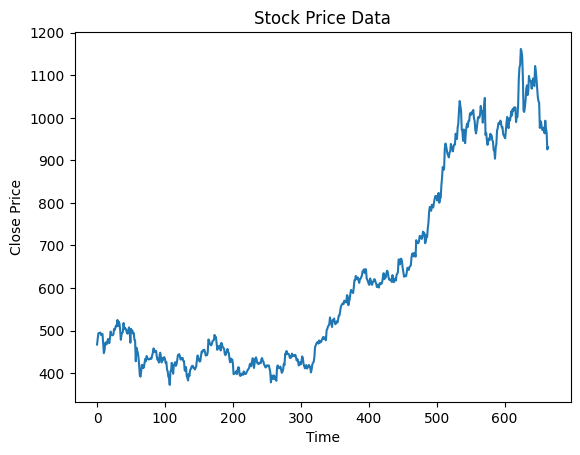

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 49, 50)              │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,507 (169.95 KB)

 Trainable params: 43,507 (169.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - loss: 0.0133 - val_loss: 0.0092
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0056 - val_loss: 0.0848
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0035 - val_loss: 0.0275
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0016 - val_loss: 0.0088
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0013 - val_loss: 0.0121
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0011 - val_l

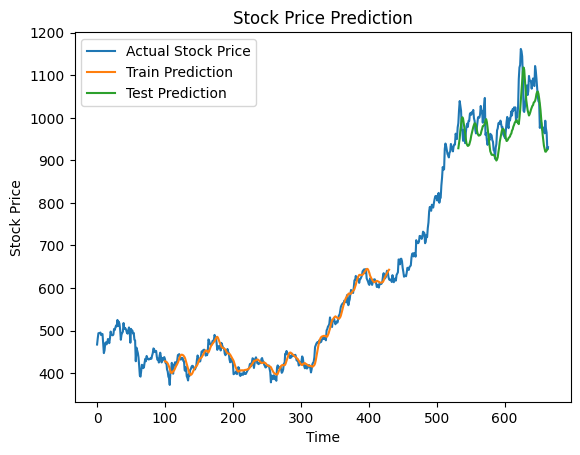

[[0.6948130130767822], [0.6894916296005249], [0.679787814617157], [0.6724679470062256], [0.6625885367393494], [0.6546287536621094], [0.645348310470581], [0.6372545957565308], [0.6287572383880615], [0.6208247542381287], [0.6131145358085632], [0.6055482029914856], [0.5985714197158813], [0.5915122628211975], [0.5851982831954956], [0.5787353515625], [0.5730154514312744], [0.567185640335083], [0.5620017051696777], [0.556797981262207], [0.5521021485328674], [0.5474839210510254], [0.5432338118553162], [0.5391392111778259], [0.535293698310852], [0.5316502451896667], [0.5281667709350586], [0.5249009132385254], [0.5217335224151611], [0.5187751054763794]]


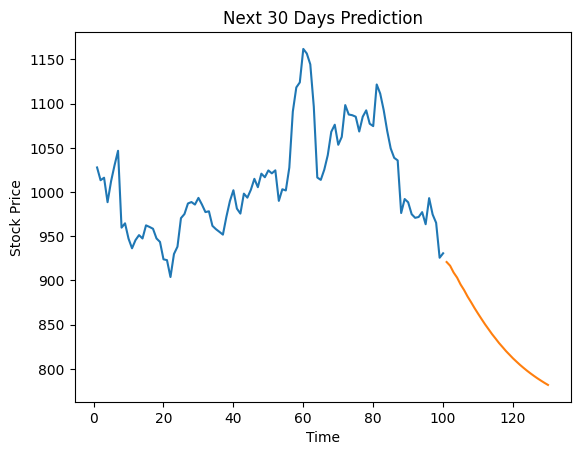

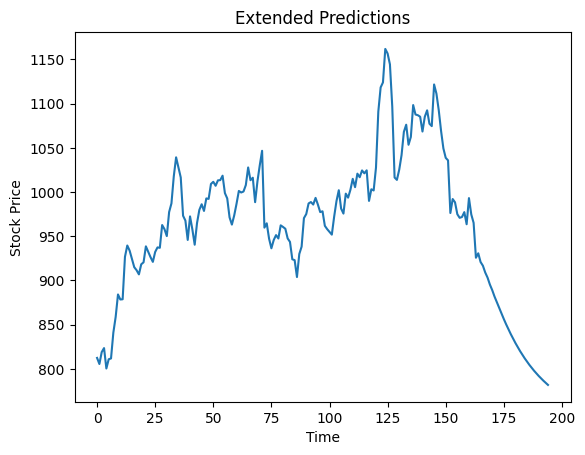

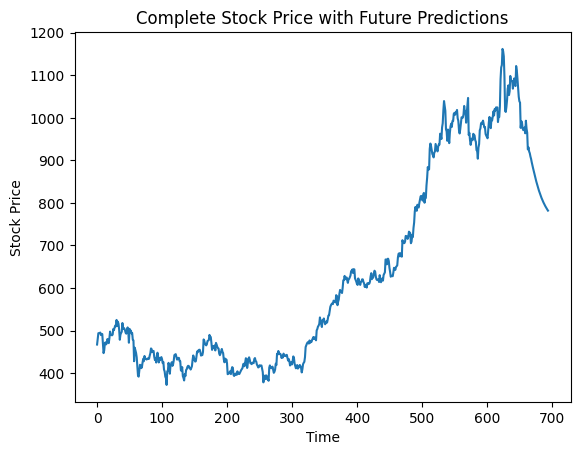

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout
import math
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/sample_data/TATA.csv')
df1 = df.reset_index()['Close']

# Plot the data
plt.plot(df1)
plt.title("Stock Price Data")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# Define a function to create the dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Prepare training and testing datasets
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :]

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input data into [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Plot predictions
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df1), label="Actual Stock Price")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Predict the next 30 days
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []

n_steps = 100
for i in range(30):
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    lst_output.extend(yhat.tolist())
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

print(lst_output)

# Plot the predictions for the next 30 days
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

plt.plot(day_new, scaler.inverse_transform(df1[len(df1) - 100:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.title("Next 30 Days Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

# Extend the original data with predictions
df3 = df1.tolist()
df3.extend(lst_output)

plt.plot(scaler.inverse_transform(df3[500:]))
plt.title("Extended Predictions")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.title("Complete Stock Price with Future Predictions")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()


Testing on multiple graphs for better visual and clear view

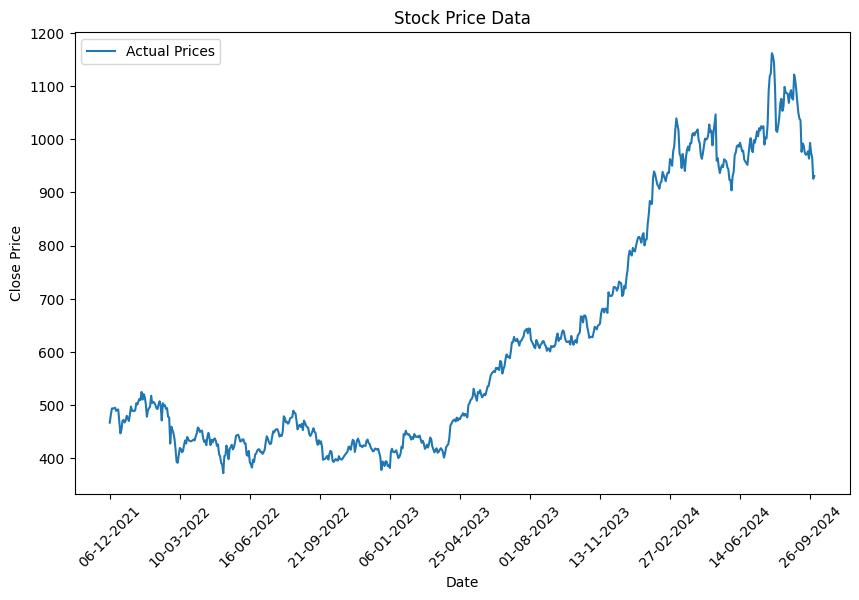

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 49, 50)              │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,507 (169.95 KB)

 Trainable params: 43,507 (169.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.0192 - val_loss: 0.0136
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0060 - val_loss: 0.0519
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0029 - val_loss: 0.0261
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0022 - val_loss: 0.0291
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0016 - val_loss: 0.0171
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0017 - val_loss: 0.0103
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0013 - val_loss: 0.0169
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0013 - val_loss: 0.0061
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0011 - val_loss: 0.0125
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0011 - val_loss: 0.0072
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0011 - v

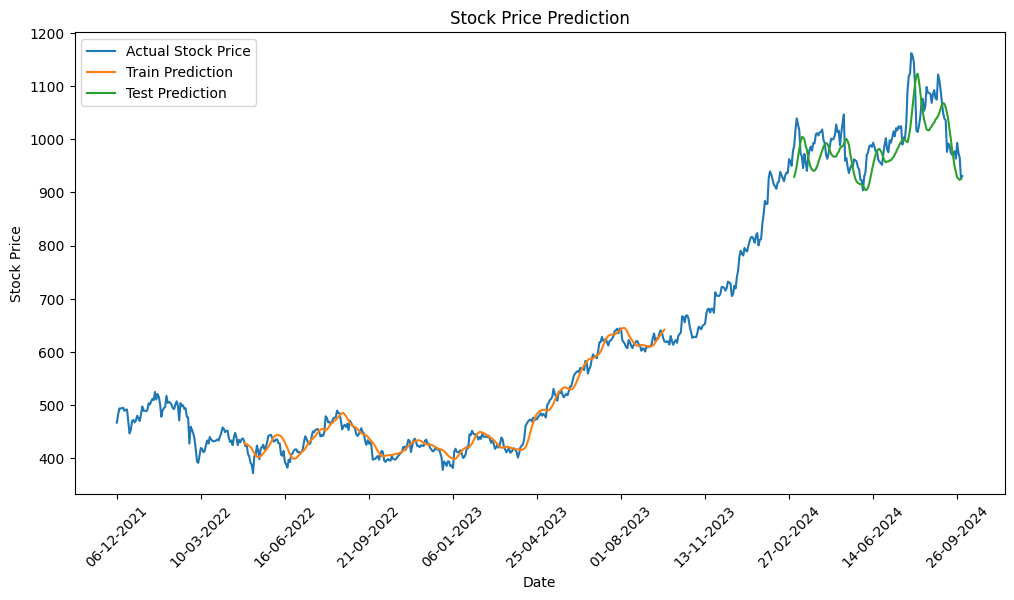

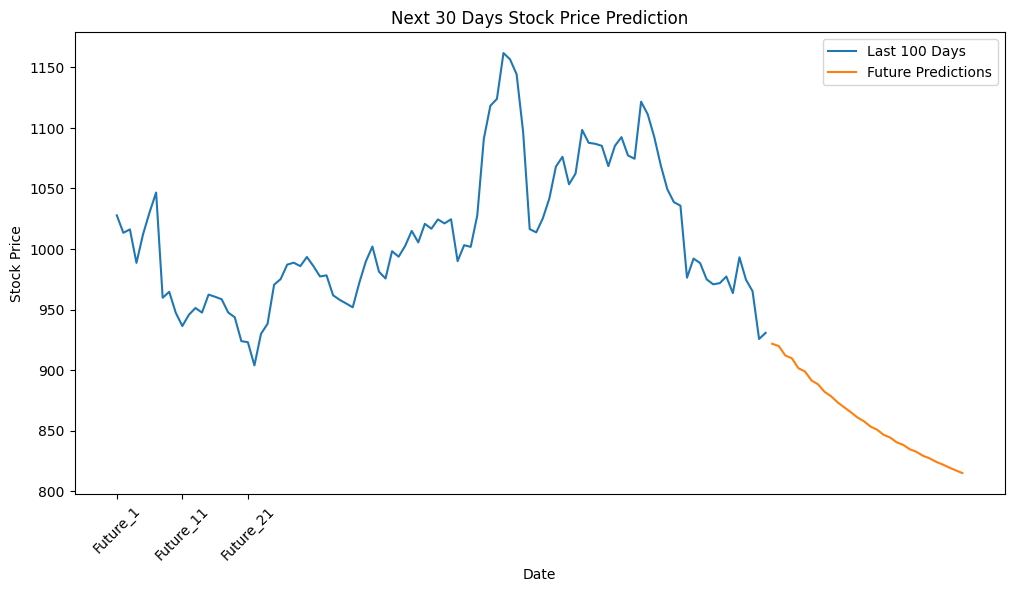

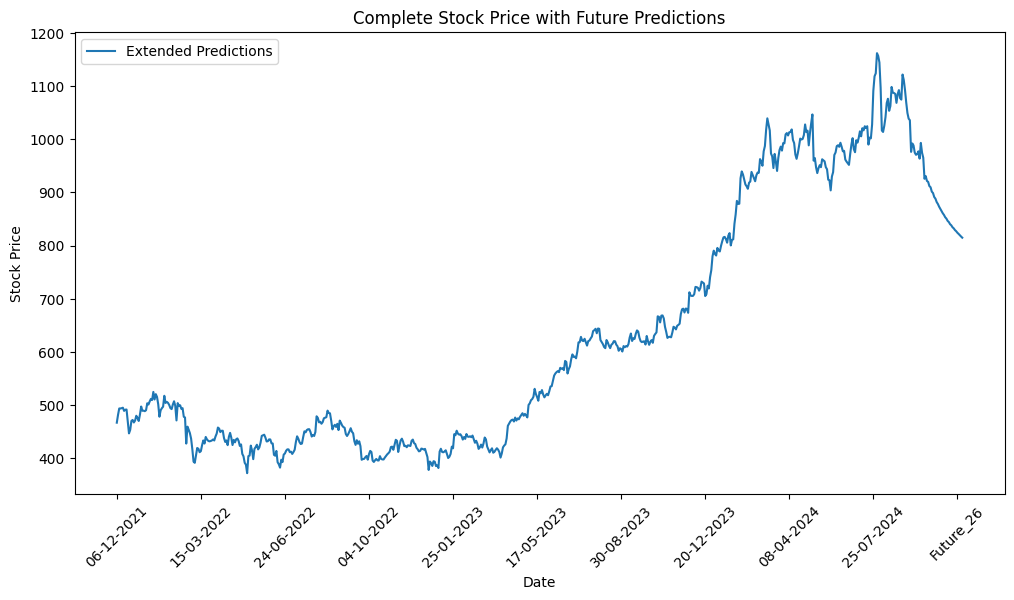

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout
import math
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/sample_data/TATA.csv')

# Extract necessary columns
dates = df['Date']  # Use the Date column as is
df1 = df['Close']

# Plot the original data with dates on x-axis
plt.figure(figsize=(10, 6))
plt.plot(dates, df1, label="Actual Prices")
plt.title("Stock Price Data")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45, ticks=np.arange(0, len(dates), step=len(dates) // 10))
plt.legend()
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# Define a function to create the dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Prepare training and testing datasets
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :]

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input data into [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Append future prediction dates
future_dates = [f"Future_{i+1}" for i in range(30)]  # Generate placeholder future dates

# Plot actual vs predictions with date ticks
plt.figure(figsize=(12, 6))
plt.plot(dates, scaler.inverse_transform(df1), label="Actual Stock Price")
plt.plot(dates[time_step:len(train_predict) + time_step], train_predict, label="Train Prediction")
plt.plot(dates[len(train_predict) + (time_step * 2) + 1:len(train_predict) + (time_step * 2) + 1 + len(test_predict)], test_predict, label="Test Prediction")
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45, ticks=np.arange(0, len(dates), step=len(dates) // 10))
plt.legend()
plt.show()

# Predict the next 30 days
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []

n_steps = 100
for i in range(30):
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    lst_output.extend(yhat.tolist())
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

# Transform future predictions back to the original scale
future_predictions = scaler.inverse_transform(lst_output)

# Plot predictions for the next 30 days

plt.figure(figsize=(12, 6))

# Select every 10th index for future dates
tick_indices = list(range(0, len(future_dates), 10))

plt.plot(dates[-100:], scaler.inverse_transform(df1[-100:]), label="Last 100 Days")
plt.plot(future_dates, future_predictions, label="Future Predictions")

plt.title("Next 30 Days Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")

# Adjust x-ticks to show every 10th date
plt.xticks(ticks=tick_indices, labels=[future_dates[i] for i in tick_indices], rotation=45)

plt.legend()
plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(dates[-100:], scaler.inverse_transform(df1[-100:]), label="Last 100 Days")
# plt.plot(future_dates, future_predictions, label="Future Predictions")
# plt.title("Next 30 Days Stock Price Prediction")
# plt.xlabel("Date")
# plt.ylabel("Stock Price")
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()

# Extend the original data with predictions
df3 = df1.tolist()
df3.extend(lst_output)

extended_dates = dates.tolist() + future_dates
plt.figure(figsize=(12, 6))
plt.plot(extended_dates, scaler.inverse_transform(df3), label="Extended Predictions")
plt.title("Complete Stock Price with Future Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45, ticks=np.arange(0, len(extended_dates), step=len(extended_dates) // 10))
plt.legend()
plt.show()


Graph points or ticks clarification. Test 01

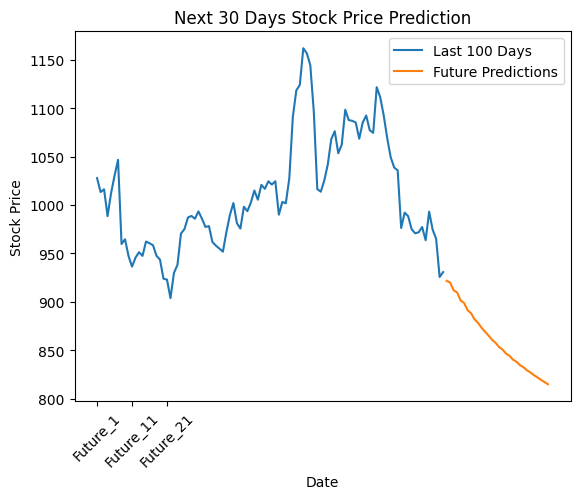

In [11]:
# Select every 10th index for future dates
tick_indices = list(range(0, len(future_dates), 10))

plt.plot(dates[-100:], scaler.inverse_transform(df1[-100:]), label="Last 100 Days")
plt.plot(future_dates, future_predictions, label="Future Predictions")

plt.title("Next 30 Days Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")

# Adjust x-ticks to show every 10th date
plt.xticks(ticks=tick_indices, labels=[future_dates[i] for i in tick_indices], rotation=45)

plt.legend()
plt.show()

Graph points or ticks clarification. Test 02

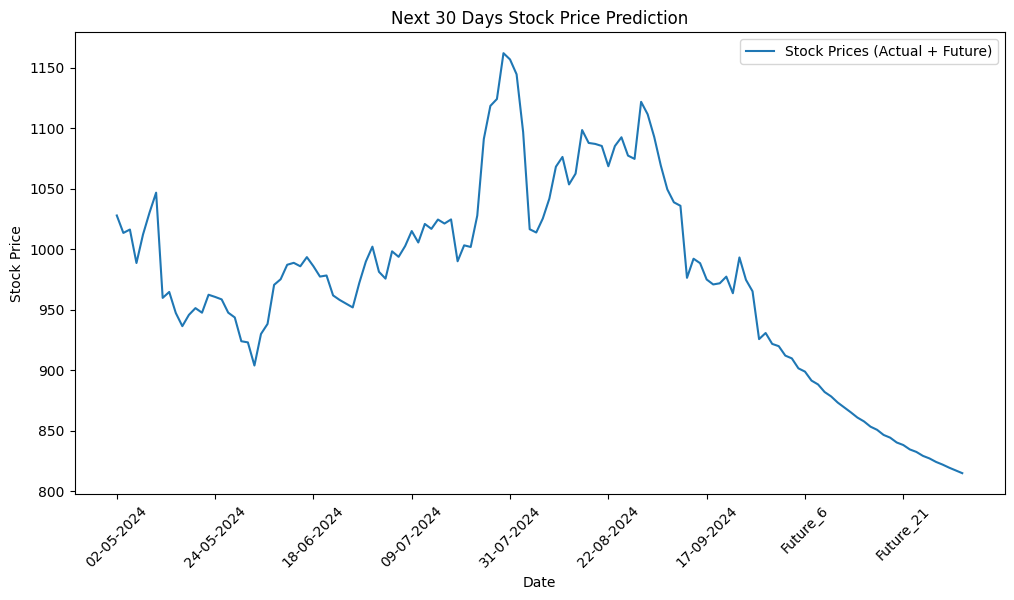

In [13]:
# Combine the last 100 actual dates and future dates
combined_dates = dates[-100:].tolist() + future_dates

# Combine the last 100 actual prices and future predictions
combined_prices = np.concatenate((scaler.inverse_transform(df1[-100:]), future_predictions), axis=0)

# Calculate tick indices for every 30 days
tick_indices = list(range(0, len(combined_dates), 15))

# Plot the predictions for both actual and future data
plt.figure(figsize=(12, 6))
plt.plot(combined_dates, combined_prices, label="Stock Prices (Actual + Future)")

# Adjust x-ticks to show every 30th date
plt.xticks(ticks=tick_indices, labels=[combined_dates[i] for i in tick_indices], rotation=45)

plt.title("Next 30 Days Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


Graph points or ticks clarification. Test 03

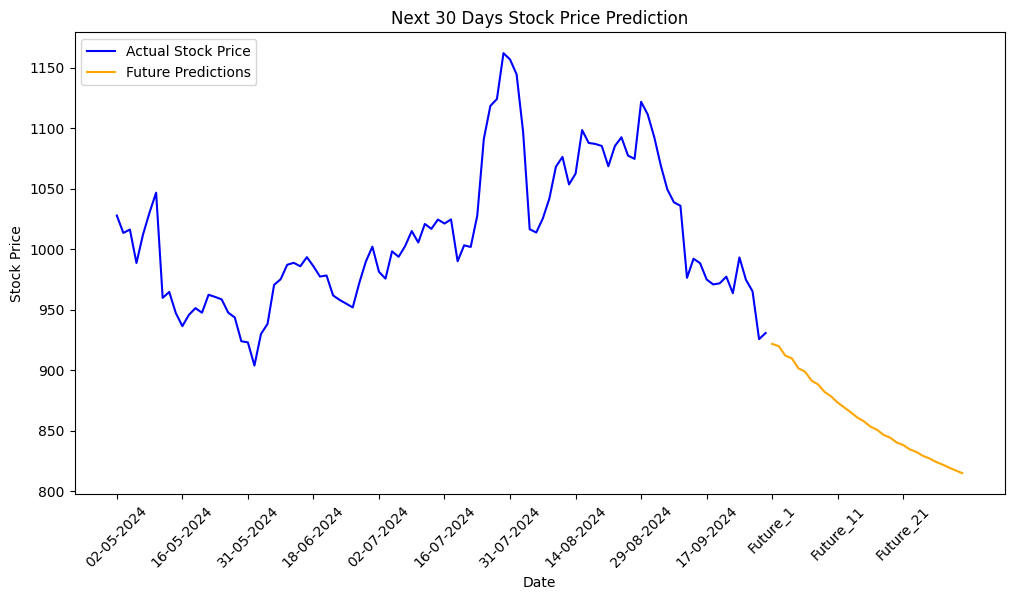

In [15]:
# Combine the last 100 actual dates and future dates
combined_dates = dates[-100:].tolist() + future_dates

# Combine the last 100 actual prices and future predictions
combined_prices = np.concatenate((scaler.inverse_transform(df1[-100:]), future_predictions), axis=0)

# Calculate tick indices for every 30 days
tick_indices = list(range(0, len(combined_dates), 10))

# Plot the predictions for both actual and future data
plt.figure(figsize=(12, 6))

# Plot the actual stock prices (Last 100 Days)
plt.plot(dates[-100:], scaler.inverse_transform(df1[-100:]), label="Actual Stock Price", color='blue')

# Plot the future stock prices (Next 30 Days)
plt.plot(future_dates, future_predictions, label="Future Predictions", color='orange')

# Adjust x-ticks to show every 30th date
plt.xticks(ticks=tick_indices, labels=[combined_dates[i] for i in tick_indices], rotation=45)

plt.title("Next 30 Days Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")

# Show legends for both actual and future predictions separately
plt.legend(loc='upper left')

plt.show()


Graph points or ticks clarification. Test 04

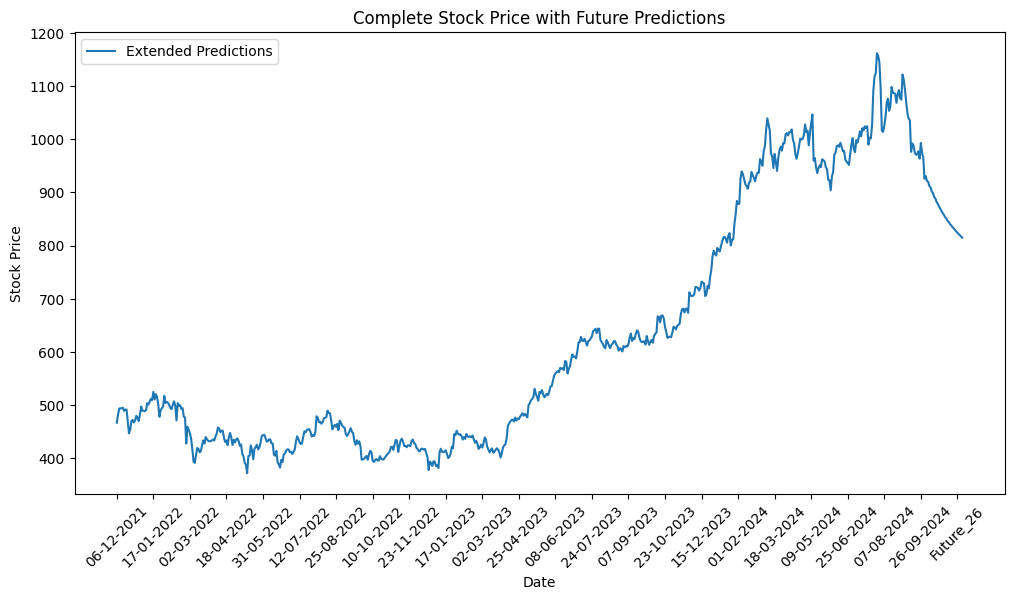

In [10]:
# Combine actual and future dates
extended_dates = dates.tolist() + future_dates

# Plot predictions for both actual and future data
plt.figure(figsize=(12, 6))
plt.plot(extended_dates, scaler.inverse_transform(df3), label="Extended Predictions")

# Calculate tick indices for every 15 days
tick_indices = list(range(0, len(extended_dates), 30))

# Set custom x-ticks for every 15 days
plt.xticks(ticks=tick_indices, labels=[extended_dates[i] for i in tick_indices], rotation=45)

plt.title("Complete Stock Price with Future Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

**Combining Everything**

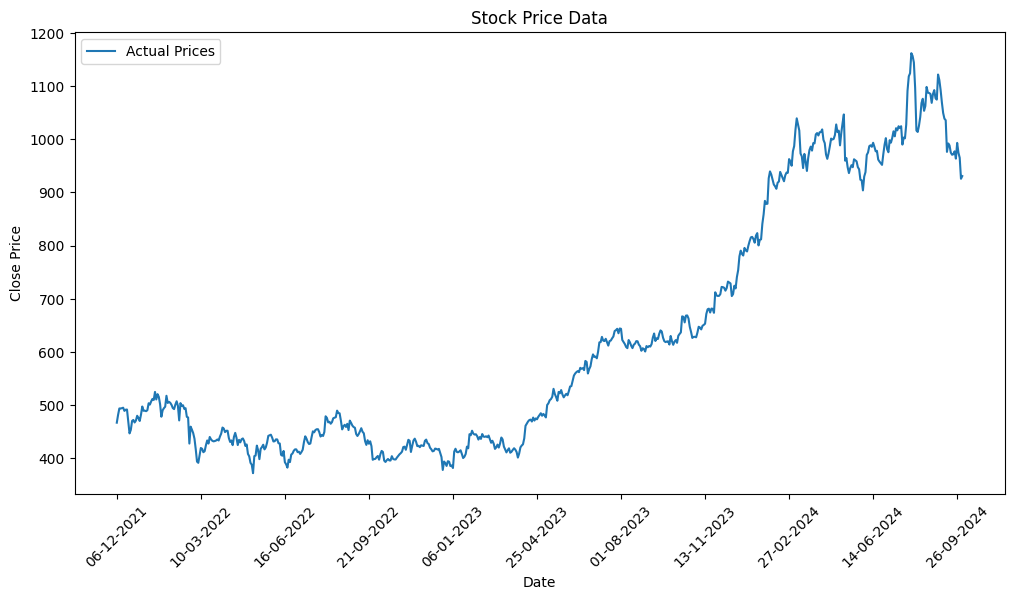

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 49, 50)              │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,507 (169.95 KB)

 Trainable params: 43,507 (169.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0142 - val_loss: 0.0101
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0048 - val_loss: 0.0629
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0032 - val_loss: 0.0102
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0016 - val_loss: 0.0161
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0010 - val_loss: 0.0040
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 9.5152e-04 - v

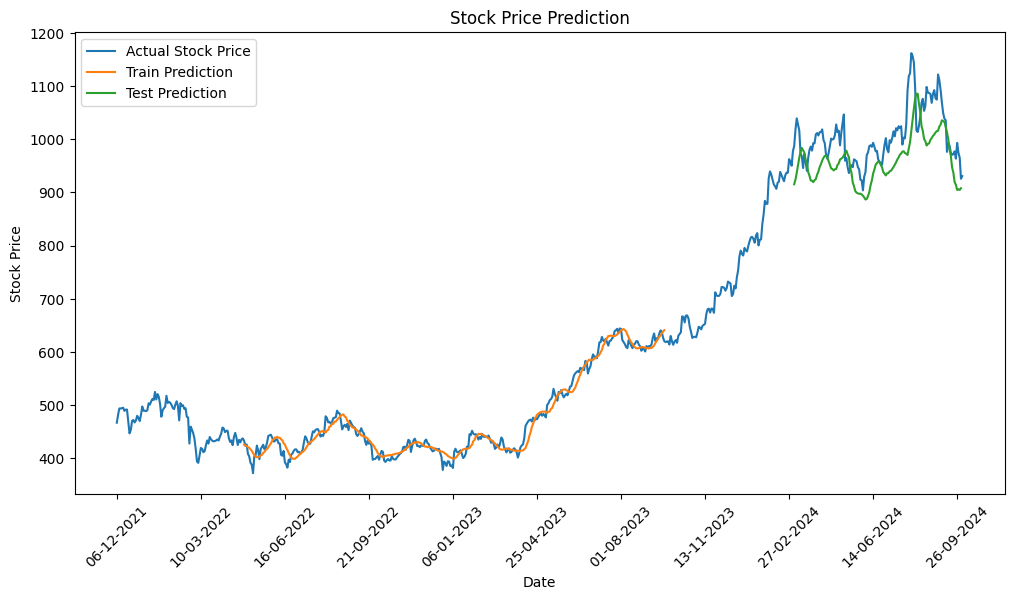

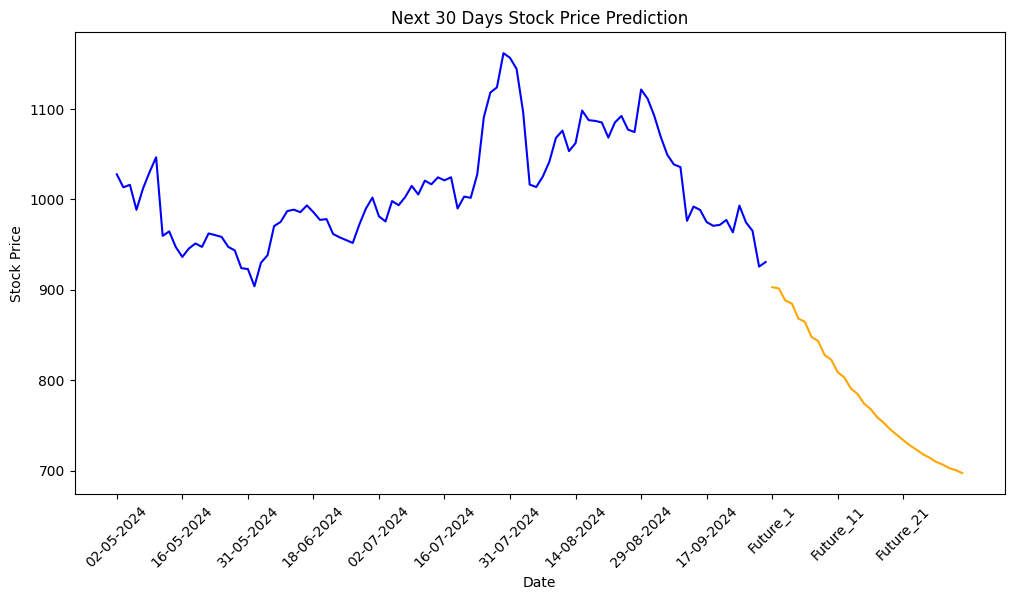

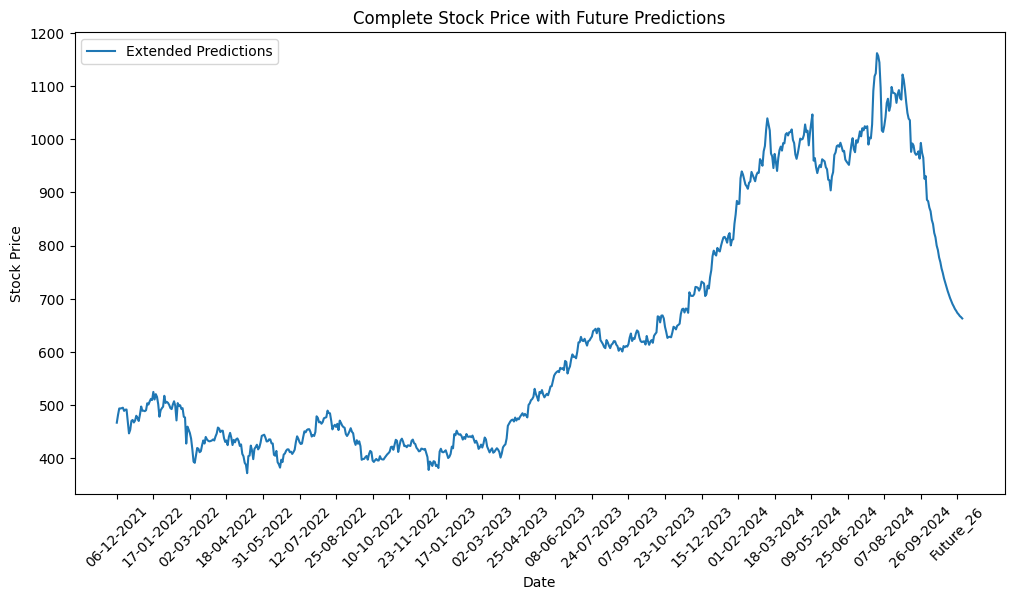

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout
import math
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/sample_data/TATA.csv')

# Extract necessary columns
dates = df['Date']  # Use the Date column as is
df1 = df['Close']

# Plot the original data with dates on x-axis
plt.figure(figsize=(12, 6))
plt.plot(dates, df1, label="Actual Prices")
plt.title("Stock Price Data")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45, ticks=np.arange(0, len(dates), step=len(dates) // 10))
plt.legend()
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# Define a function to create the dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Prepare training and testing datasets
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :]

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input data into [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Append future prediction dates
future_dates = [f"Future_{i+1}" for i in range(30)]  # Generate placeholder future dates

# Plot actual vs predictions with date ticks
plt.figure(figsize=(12, 6))
plt.plot(dates, scaler.inverse_transform(df1), label="Actual Stock Price")
plt.plot(dates[time_step:len(train_predict) + time_step], train_predict, label="Train Prediction")
plt.plot(dates[len(train_predict) + (time_step * 2) + 1:len(train_predict) + (time_step * 2) + 1 + len(test_predict)], test_predict, label="Test Prediction")
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45, ticks=np.arange(0, len(dates), step=len(dates) // 10))
plt.legend()
plt.show()

# Predict the next 30 days
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []

n_steps = 100
for i in range(30):
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    lst_output.extend(yhat.tolist())
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

# Transform future predictions back to the original scale
future_predictions = scaler.inverse_transform(lst_output)

# Plot predictions for the next 30 days
# Combine the last 100 actual dates and future dates
combined_dates = dates[-100:].tolist() + future_dates

# Combine the last 100 actual prices and future predictions
combined_prices = np.concatenate((scaler.inverse_transform(df1[-100:]), future_predictions), axis=0)

# Calculate tick indices for every 30 days
tick_indices = list(range(0, len(combined_dates), 10))

# Plot the predictions for both actual and future data
plt.figure(figsize=(12, 6))

# Plot the actual stock prices (Last 100 Days)
plt.plot(dates[-100:], scaler.inverse_transform(df1[-100:]), label="Actual Stock Price", color='blue')

# Plot the future stock prices (Next 30 Days)
plt.plot(future_dates, future_predictions, label="Future Predictions", color='orange')

# Adjust x-ticks to show every 30th date
plt.xticks(ticks=tick_indices, labels=[combined_dates[i] for i in tick_indices], rotation=45)

plt.title("Next 30 Days Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")

# Show legends for both actual and future predictions separately
# plt.legend(loc='upper left')

# plt.show()

# # Extend the original data with predictions
# df3 = df1.tolist()
# df3.extend(lst_output)

# extended_dates = dates.tolist() + future_dates
# plt.figure(figsize=(12, 6))
# plt.plot(extended_dates, scaler.inverse_transform(df3), label="Extended Predictions")
# plt.title("Complete Stock Price with Future Predictions")
# plt.xlabel("Date")
# plt.ylabel("Stock Price")
# plt.xticks(rotation=45, ticks=np.arange(0, len(extended_dates), step=len(extended_dates) // 10))
# plt.legend()
# plt.show()


# Combine actual and future dates
extended_dates = dates.tolist() + future_dates

# Plot predictions for both actual and future data
plt.figure(figsize=(12, 6))
plt.plot(extended_dates, scaler.inverse_transform(df3), label="Extended Predictions")

# Calculate tick indices for every 15 days
tick_indices = list(range(0, len(extended_dates), 30))

# Set custom x-ticks for every 15 days
plt.xticks(ticks=tick_indices, labels=[extended_dates[i] for i in tick_indices], rotation=45)

plt.title("Complete Stock Price with Future Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()